In [38]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.corpus import stopwords
import string
string.punctuation
import re
import math
import json
import gensim
from collections import Counter
from num2words import num2words
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [3]:
data= pd.read_json('/media/maruf/DataStorage/Data/scm/Gift_Cards.json', lines=True)

In [4]:
data = data.drop(['reviewerName', 'vote','style', 'image'], axis= 1)

In [5]:
data.head(5)

overall  verified   reviewTime      reviewerID        asin  \
0        1     False  12 19, 2008   APV13CM0919JD  B001GXRQW0   
1        5     False  12 17, 2008  A3G8U1G1V082SN  B001GXRQW0   
2        5     False  12 17, 2008   A11T2Q0EVTUWP  B001GXRQW0   
3        5     False  12 17, 2008   A9YKGBH3SV22C  B001GXRQW0   
4        1      True  12 17, 2008  A34WZIHVF3OKOL  B001GXRQW0   

                                          reviewText  \
0  Amazon,\nI am shopping for Amazon.com gift car...   
1  I got this gift card from a friend, and it was...   
2  aren't we going to save trees?! :) People who ...   
3  You can always get someone something from Amaz...   
4  Why take 50 dollars of good money with no limi...   

                                             summary  unixReviewTime  
0                                   Merry Christmas.      1229644800  
1                      Gift card with best selection      1229472000  
2  A convenient and great gift for the environmen...      1229472000  
3                                 Totally make sense      1229472000  
4                                         Give CASH!      1229472000

In [6]:
data.overall.value_counts()

5    126689
4      8700
1      7165
3      2996
2      1644
Name: overall, dtype: int64

In [7]:
print("Summary statistics of numerical features : \n", data.describe())

print("\nTotal number of reviews: ",len(data))
print("\nTotal number of unique products: ", len(list(set(data['asin']))))

print("\nPercentage of reviews with neutral sentiment : {:.2f}%"\
      .format(data[data['overall']==3]["overall"].count()/len(data)*100))
print("\nPercentage of reviews with positive sentiment : {:.2f}%"\
      .format(data[data['overall']>3]["overall"].count()/len(data)*100))
print("\nPercentage of reviews with negative sentiment : {:.2f}%"\
      .format(data[data['overall']<3]["overall"].count()/len(data)*100))

Summary statistics of numerical features : 
              overall  unixReviewTime
count  147194.000000    1.471940e+05
mean        4.671970    1.447245e+09
std         0.955134    5.221619e+07
min         1.000000    1.228522e+09
25%         5.000000    1.409789e+09
50%         5.000000    1.453334e+09
75%         5.000000    1.485389e+09
max         5.000000    1.538266e+09

Total number of reviews:  147194

Total number of unique products:  1548

Percentage of reviews with neutral sentiment : 2.04%

Percentage of reviews with positive sentiment : 91.98%

Percentage of reviews with negative sentiment : 5.98%


Text(0, 0.5, 'Count')

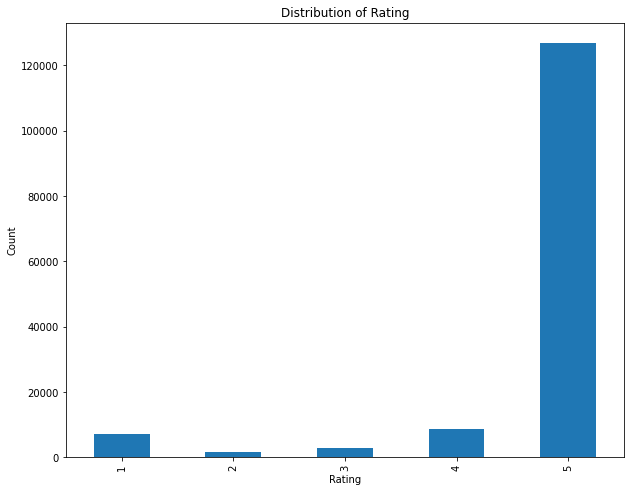

In [8]:
# Plot distribution of rating
plt.figure(figsize=(10,8))
# sns.countplot(df['Rating'])
data['overall'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0.5, 1.0, 'Number of Reviews for Top 20 Products')

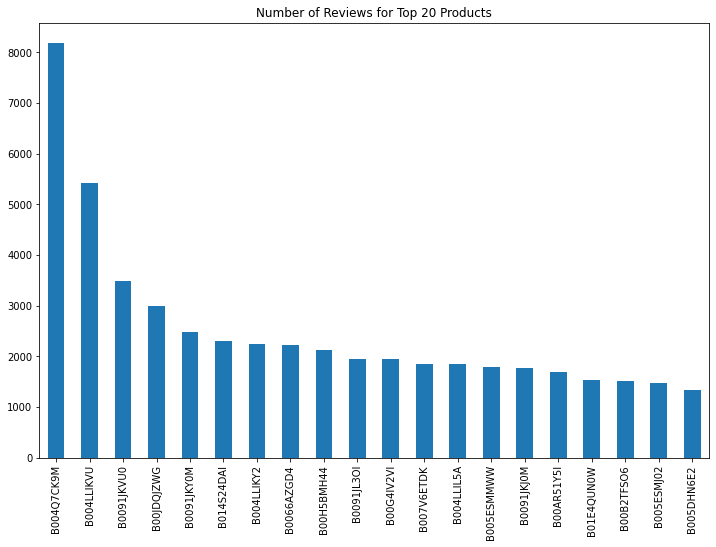

In [9]:
# Plot number of reviews for top 20 brands
brands = data["asin"].value_counts()
# brands.count()
plt.figure(figsize=(12,8))
brands[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 20 Products")

Text(0, 0.5, 'Count')

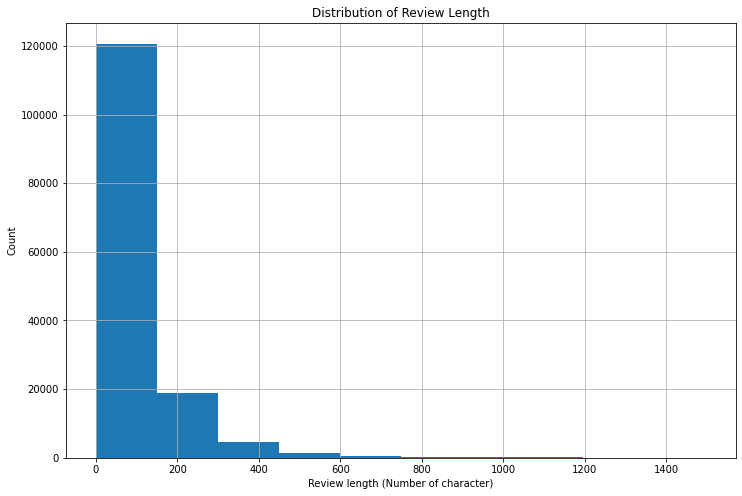

In [10]:
# Plot distribution of review length
review_length = data["reviewText"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 1500].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length (Number of character)')
plt.ylabel('Count')

pos = data.loc[data['overall'] > 3]
neg = data.loc[data['overall'] < 3]

In [11]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/maruf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/maruf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

def create_Word_Corpus(temp):
    words_corpus = ''
    for val in temp['reviewText']:
        text = str(val).lower()
        #text = text.translate(trantab)
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        for words in tokens:
            words_corpus = words_corpus + words + ' '
    return words_corpus
        
# Generate a word cloud image
pos_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(pos))
neg_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(neg))

def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='w')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    plt.savefig('wordclouds.png', facecolor='w', bbox_inches='tight')

#Visuallizing popular positive words
plot_Cloud(pos_wordcloud)

plot_Cloud(neg_wordcloud)

In [12]:
from nltk import FreqDist
def freq_words(x, terms = 10):
  all_words = ''.join([str(text) for text in x])
  all_words = all_words.split()
  
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top 10 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,10))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

In [13]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [14]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/maruf/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/maruf/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
def expand_constraction(text):
    for key in contractions:
        value = contractions[key]
        text = str(text).replace(key, value)
    return text
data['expand_constract'] = data['summary'].apply(lambda x:expand_constraction(x))

In [16]:
def remove_newlines_tabs(text):
    formatted_text = text.replace('\\n', "").replace('\nI', " I").replace('\n',"").replace('\t',"").replace('\\', "").replace('. com', '.com').replace('.com', "").replace('!!', "").replace(':-)', "").replace('.',"").replace('!', "").replace('aaa',"").replace('aa',"a").replace('amazon',"").replace('zz',"z").replace('zzz',"z").replace('Amazon',"").replace('amazoncom',"").replace('abd',"")
    return formatted_text
data['removetabs_msg'] = data['expand_constract'].apply(lambda x:remove_newlines_tabs(x))

In [17]:
def remove_punctuation(text):
    punctuationfree = "". join([i for i in str(text) if i not in string.punctuation])
    return punctuationfree
data['clean_msg'] = data['removetabs_msg'].apply(lambda x:remove_punctuation(x))

In [18]:
def remove_number(text):
    answer = []
    for char in text:
        if not char.isdigit():
            answer.append(char)
    return ''.join(answer)

data['no_number'] = data['clean_msg'].apply(lambda x: remove_number(x)) 

In [19]:
data['lower_msg'] = data['no_number'].apply(lambda x: x.lower())

In [20]:
# pd.set_option('display.max_rows', None)
# print(data['lower_msg'])
data['lower_msg']

0                                          merry christmas
1                            gift card with best selection
2         a convenient and great gift for the environment 
3                                       totally make sense
4                                                give cash
                                ...                       
147189                           just always great service
147190                                        good to have
147191                                           gift card
147192                      easy to buy and give as a gift
147193                                    gift for grandpa
Name: lower_msg, Length: 147194, dtype: object

In [21]:
def remove_repeatedchar(text):
    pattern = r'(.)\1{2,}'
    repl = r'\1'
    repeat = re.sub(pattern,repl,str(text))
    return repeat

data['no_repeat'] = data['lower_msg'].apply(lambda x: remove_repeatedchar(x))

In [22]:
data['no_repeat']

0                                          merry christmas
1                            gift card with best selection
2         a convenient and great gift for the environment 
3                                       totally make sense
4                                                give cash
                                ...                       
147189                           just always great service
147190                                        good to have
147191                                           gift card
147192                      easy to buy and give as a gift
147193                                    gift for grandpa
Name: no_repeat, Length: 147194, dtype: object

In [23]:
def tokenization(text):
    tokens = re.split('\W+',text)
    return tokens
data['msg_token']= data['no_repeat'].apply(lambda x: tokenization(x))

In [24]:
from nltk.corpus import stopwords, wordnet
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
data['no_stopwords']= data['msg_token'].apply(lambda x:remove_stopwords(x))

In [25]:
def filter(text):
    filter = [w for w in text if w.isalpha()]
    return filter
data['filter']= data['no_stopwords'].apply(lambda x:filter(x))    

In [26]:
data['filter']

0                             [merry, christmas]
1                  [gift, card, best, selection]
2         [convenient, great, gift, environment]
3                         [totally, make, sense]
4                                   [give, cash]
                           ...                  
147189                  [always, great, service]
147190                                    [good]
147191                              [gift, card]
147192                   [easy, buy, give, gift]
147193                           [gift, grandpa]
Name: filter, Length: 147194, dtype: object

In [27]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
data['lemmatized'] = data['filter'].apply(lambda x: [wordnet_lemmatizer.lemmatize(word) for word in x])

In [47]:
data['lemmatized']

0                             [merry, christmas]
1                  [gift, card, best, selection]
2         [convenient, great, gift, environment]
3                         [totally, make, sense]
4                                   [give, cash]
                           ...                  
147189                  [always, great, service]
147190                                    [good]
147191                              [gift, card]
147192                   [easy, buy, give, gift]
147193                           [gift, grandpa]
Name: lemmatized, Length: 147194, dtype: object

In [48]:
data_lema = data['lemmatized']

In [49]:
tfidf = TfidfVectorizer(ngram_range=(0,2))
response = tfidf.fit_transform(data_lema.apply(lambda x: np.str_(x)))


In [50]:
feature_names = tfidf.get_feature_names()
# for col in response.nonzero()[1]:
#     print (feature_names[col], ' - ', response[0, col])
TffeatureData = pd.DataFrame(tfidf.idf_,index=tfidf.get_feature_names(),columns=['weights'])
TffeatureData.sort_values(by=['weights'])

weights
                   1.000000
star               1.880622
five               1.986937
five star          1.987211
gift               2.441624
...                     ...
jonesboro ar      12.206366
check bit         12.206366
jos luis          12.206366
joint shoestring  12.206366
zynga poker       12.206366

[61139 rows x 1 columns]

In [51]:
import pickle
pickle.dump(tfidf, open("pickle/tfv_stop_newG.pkl", "wb"))
TffeatureData.to_pickle("pickle/dtm_stop_newG.pkl")

In [52]:
data_pickle = pd.read_pickle('pickle/dtm_stop_newG.pkl')
data_pickle.sort_values(by=['weights'])

weights
                   1.000000
star               1.880622
five               1.986937
five star          1.987211
gift               2.441624
...                     ...
jonesboro ar      12.206366
check bit         12.206366
jos luis          12.206366
joint shoestring  12.206366
zynga poker       12.206366

[61139 rows x 1 columns]

In [53]:
from gensim import matutils, models, corpora

import scipy.sparse
tdm = data_pickle.transpose()
tdm.head()

aaw      aazon  aazon gift         ab  ab scratched  \
weights  1.0  12.206366  12.206366   12.206366  12.206366     12.206366   

             abbey      abear  abear fun   ability  ...  zone delivery  \
weights  12.206366  12.206366  12.206366  9.532218  ...      12.206366   

          zone one  zone otherwise       zoom         zu  zu facebook  \
weights  12.206366       12.206366  12.206366  12.206366    12.206366   

             zumba  zumba dvd      zynga  zynga poker  
weights  12.206366  12.206366  12.206366    12.206366  

[1 rows x 61139 columns]

In [54]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(TffeatureData)
corpus = matutils.Sparse2Corpus(sparse_counts)
print(corpus)

In [55]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv = pickle.load(open("pickle/tfv_stop_newG.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())
co_dict = corpora.dictionary
co_dict.id2token = id2word
co_dict.token2id = id2word

bigram = gensim.models.Phrases(data_lema, min_count=2, threshold=5) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_lema], threshold=5)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [56]:
data_lema

0                             [merry, christmas]
1                  [gift, card, best, selection]
2         [convenient, great, gift, environment]
3                         [totally, make, sense]
4                                   [give, cash]
                           ...                  
147189                  [always, great, service]
147190                                    [good]
147191                              [gift, card]
147192                   [easy, buy, give, gift]
147193                           [gift, grandpa]
Name: lemmatized, Length: 147194, dtype: object

data_l = make_bigrams(data_lema)
data_l

dictionary = gensim.corpora.Dictionary(data_l)
# count = 0
# for k, v in dictionary.iteritems():
#     print(k, v)
#     count += 1
#     if count > 10:
#         break
bow_corpus = [dictionary.doc2bow(doc) for doc in data_l]
bow_corpus[4310]

from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=3, id2word=dictionary, passes=100)

for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

In [57]:
import gensim
# LDA for num_topics = 3
lda = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=3,passes=100, random_state=100,chunksize=100,per_word_topics=True)
lda.print_topics()

[(0,
  '0.000*"kind sad" + 0.000*"kind scam" + 0.000*"kind gifting" + 0.000*"kind graduation" + 0.000*"kind inconvenient" + 0.000*"kind nice" + 0.000*"kind perfect" + 0.000*"kind pet" + 0.000*"kind problem" + 0.000*"kind review"'),
 (1,
  '0.000*"cute girl" + 0.000*"grow like" + 0.000*"payment approved" + 0.000*"group people" + 0.000*"cute graduation" + 0.000*"cute graduate" + 0.000*"something actual" + 0.000*"cute hard" + 0.000*"something book" + 0.000*"paying way"'),
 (2,
  '0.000*"perfect lot" + 0.000*"perfect looking" + 0.000*"perfect made" + 0.000*"perfect lover" + 0.000*"perfect loved" + 0.000*"perfect love" + 0.000*"perfect match" + 0.000*"perfect location" + 0.000*"perfect long" + 0.000*"perfect moment"')]